In [11]:
# Parámetros de la simulación
num_particulas = 160
num_pasos = 100
dt = 1.0
num_simulaciones = 1
tamano_caja = 125.0
prob_derecha = 2 / 3  # Probabilidad de ir a la derecha (antes era izquierda)
num_obstaculos = 20  ### Nuevo: Número de obstáculos
tamano_obstaculos_max = np.sqrt(tamano_caja**2 / num_obstaculos)  ### Nuevo: Tamaño máximo permitido para los obstáculos



# Elasticidad del rebote (0 = totalmente inelástico, 1 = totalmente elástico)
elasticity = 0.9  ### Nuevo: Ajusta según la elasticidad deseada
# Crear una matriz para almacenar los MSD de cada simulación en la dirección x e y
msd_simulaciones = np.zeros((num_simulaciones, num_pasos + 1, 2))
distribucion_pasos = []
distribucion_angulos = []
trayectorias = []
# Información de colisiones con obstáculos
colisiones_con_obstaculos = []




In [12]:
for sim in range(num_simulaciones):
    posiciones = np.zeros((num_particulas, num_pasos + 1, 2))
    
    # Inicialización de las posiciones dentro de la caja
    posiciones[:, 0] = np.random.uniform(-tamano_caja / 2, tamano_caja / 2, size=(num_particulas, 2))

    # Creación de obstáculos
    obstaculos = np.random.uniform(-tamano_caja / 2, tamano_caja / 2, size=(num_obstaculos, 2))

    for i in range(num_pasos):
        random_steps = np.random.normal(0, np.sqrt(dt), size=(num_particulas, 2))
        angulos = np.random.choice([0, -180], size=num_particulas, p=[prob_derecha, 1 - prob_derecha])

        distribucion_angulos.append(angulos)
        direcciones = np.column_stack((np.cos(np.radians(angulos)), np.sin(np.radians(angulos))))
        
        # Actualización de las posiciones
        posiciones[:, i+1] = posiciones[:, i] + random_steps * direcciones
        
        # Manejo de colisiones con las paredes de la caja
        posiciones[:, i+1] = np.maximum(np.minimum(posiciones[:, i+1], tamano_caja / 2), -tamano_caja / 2)

        # Manejo de colisiones con obstáculos
        for j in range(num_obstaculos):
            distancia_obstaculo = np.linalg.norm(posiciones[:, i+1] - obstaculos[j], axis=1)
            colisiones = distancia_obstaculo < tamano_obstaculos_max / 2
            colisiones_con_obstaculos.extend(list(zip(np.where(colisiones)[0], [j] * np.sum(colisiones))))

    # Cálculo del Mean Square Displacement (MSD) para esta simulación en ambas direcciones
    msd_simulaciones[sim, :, 0] = np.mean((posiciones[:, :, 0] - posiciones[:, 0, 0][:, np.newaxis])**2, axis=0)
    msd_simulaciones[sim, :, 1] = np.mean((posiciones[:, :, 1] - posiciones[:, 0, 1][:, np.newaxis])**2, axis=0)

    # Cálculo de la distribución de pasos en ambas direcciones para esta simulación
    distribucion_pasos.append(np.sqrt(np.sum((posiciones[:, 1:] - posiciones[:, :-1])**2, axis=(1, 2))))

    # Almacenar las trayectorias en ambas direcciones para esta simulación
    trayectorias.append(posiciones)

In [13]:
msd_promedio = np.mean(msd_simulaciones, axis=0)
coeficiente_difusion_x = msd_promedio[:, 0] / (2 * np.arange(num_pasos + 1) * dt + 1e-10)
coeficiente_difusion_y = msd_promedio[:, 1] / (2 * np.arange(num_pasos + 1) * dt + 1e-10)

# Restablecer el tamaño de la figura
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

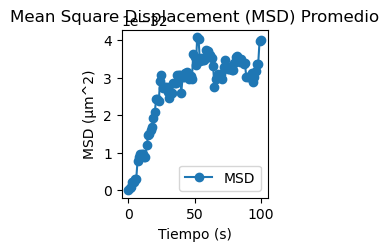

In [14]:
plt.subplot(232)
plt.plot(np.arange(num_pasos + 1) * dt, msd_promedio[:, 1], marker='o', linestyle='-', label='MSD')
plt.title('Mean Square Displacement (MSD) Promedio')
plt.xlabel('Tiempo (s)')
plt.ylabel('MSD (µm^2)')
plt.legend()

Text(0, 0.5, 'Densidad')

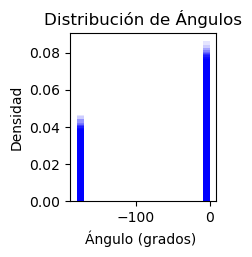

In [15]:
plt.subplot(235)
for distribucion_angulos in distribucion_angulos:
    plt.hist(distribucion_angulos, bins=20, density=True, alpha=0.1, color='b')
plt.title('Distribución de Ángulos')
plt.xlabel('Ángulo (grados) ')
plt.ylabel('Densidad')

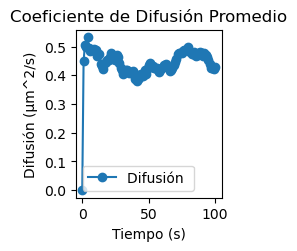

In [16]:
plt.subplot(233)
plt.plot(np.arange(num_pasos + 1) * dt, coeficiente_difusion_x, marker='o', linestyle='-', label='Difusión ')
plt.title('Coeficiente de Difusión Promedio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Difusión (µm^2/s)')
plt.legend()

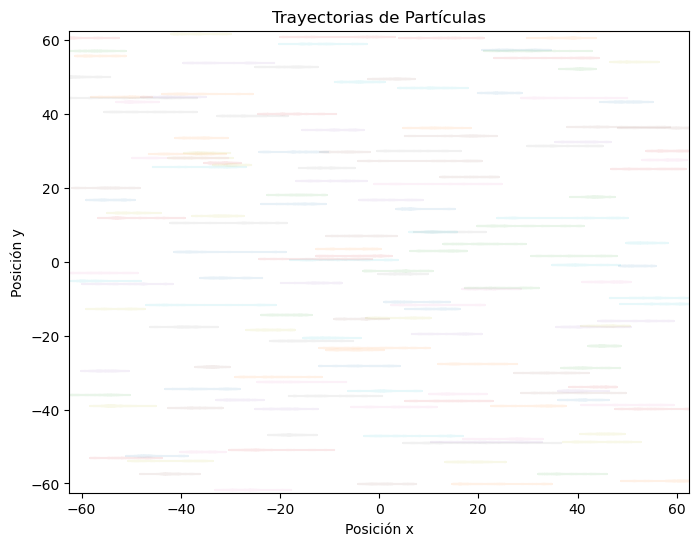

In [17]:
# Grafica trayectorias de partículas
plt.figure(figsize=(8, 6))
for trayectorias in trayectorias:
    for i in range(num_particulas):
        plt.plot(trayectorias[i, :, 0], trayectorias[i, :, 1], alpha=0.1)
plt.title('Trayectorias de Partículas')
plt.xlim(-tamano_caja / 2, tamano_caja / 2)
plt.ylim(-tamano_caja / 2, tamano_caja / 2)
plt.xlabel('Posición x')
plt.ylabel('Posición y')
plt.show()

Text(0, 0.5, 'Densidad')

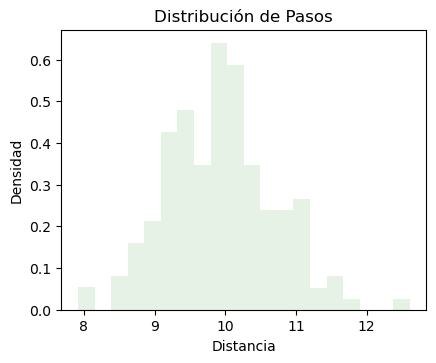

In [18]:
# Visualización de la distribución de pasos con información sobre colisiones con obstáculos
plt.figure(figsize=(16, 8))
plt.subplot(231)
for distribucion_pasos_sim in distribucion_pasos:
    plt.hist(distribucion_pasos_sim, bins=20, density=True, alpha=0.1, color='g')
plt.title('Distribución de Pasos')
plt.xlabel('Distancia')
plt.ylabel('Densidad')